Hola Paulina!

Mi nombre es Matias y voy a estar revisando tu proyecto.

En la primer revision, de encontrar errores voy a estar marcandotelos para que puedas corregirlos por tu cuenta. Lo mas parecido a una situacion real de trabajo como DA. De haber posteriores revisiones ire brindandote mayor soporte para resolver el proyecto

Encontraras mis comentarios debajo - **por favor no los muevas, modifiques o elimines**.

Encontraras mis comentarios en verde, amarillo o rojo de esta manera:

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Cuidado, se recomienda...
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correcion. El trabajo no puede ser aceptado si precisa correcion.
</div>

Puedes responder a mis comentarios utilizando un mensaje de este tipo:

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>
    
Hola Matias en esta iteracion he...
</div>

# Descripción del proyecto: Robots en Los Ángeles

Con un grupo de amigos hemos decidido abrir un pequeño café regentado por robots en Los Ángeles. El proyecto es prometedor pero caro, por lo que debemos hacer una presentación para intentar atraer inversionistas. Están interesados en las condiciones actuales del mercado, pero la pregunta al final del día será:  ¿podremos mantener el éxito del café cuando la novedad de los camareros robot desaparezca?

Para preparar la presentación para los fututos inversionistas, llevaremos a cabo un estudio de mercado, siguiendo los siguiendo los próximos pasos:  

- Paso 1. Descarga los datos y prepáralos para el análisis  
- Paso 2. Análisis de datos: al final de esta sección presentaremos una conclusión y aportaremos recomendaciones sobre el tipo de restaurante y el número de asientos. Comentando sobre la posibilidad de desarrollar una cadena. 


In [1]:
#importamos las librerias 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set_theme()

# Paso 1. Descarga los datos y prepáralos para el análisis

In [2]:
#Descargamos los datos de los restaurantes en LA
rest_data = pd.read_csv('/datasets/rest_data_us.csv')

**Descripción de datos**
**Tabla rest_data:**
- object_name — nombre del establecimiento
- chain — establecimiento que pertenece a una cadena (TRUE/FALSE)
- object_type — tipo de establecimiento
- address — dirección
- number — número de asientos

In [3]:
#analizamos la data
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
# Verificamos si hay duplicados en todo el DataFrame
duplicados_total = rest_data.duplicated()
print("Duplicados en todo el DataFrame:")
print(duplicados_total.any())  # Devuelve True si hay duplicados, False si no hay.

Duplicados en todo el DataFrame:
False


 En resumen, en los análisis anteriores vimos que el tipo de datos para cada columna es correcto, que no hay valores ausentes ni duplicados.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen comienzo.
</div>

# Paso 2. Análisis de datos

**1. Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.**

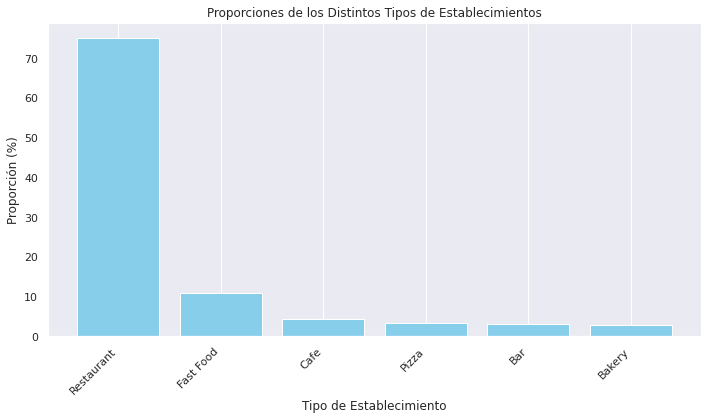

In [6]:
# Calcular las proporciones de los distintos tipos de establecimientos
proporciones_establecimientos = rest_data['object_type'].value_counts(normalize=True) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(proporciones_establecimientos.index, proporciones_establecimientos.values, color='skyblue')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Proporción (%)')
plt.title('Proporciones de los Distintos Tipos de Establecimientos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Aquí podemos ver que "Restaurant" es el tipo de establecimiento que sobreindexa con un 75% a los otros tipos e establecimiento. Lo que quiere decir, que dentro de la ciudad de Los Ángeles, el mayor número de establecimientos alimenticios se dedican a entregar un servicio de restaurante (meseros, mantel, comida a elección según menú, etc). 
Luego en 2do lugar, se encuentran los servicios de Fast-food, enseguida Cafeterias y en último lugar Pizzerias, Bar y Bakery. Ya que estos conforman un servicio más espefífico que puede encontrarse dentro de los primeros. Por ejemplo, los productos de un bakery, pueden encontrarse en un café, y Pizza y Bar dentro de un restaurant.

**2.Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.**

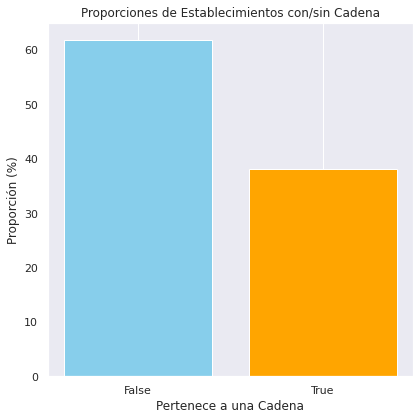

In [7]:
# Calcular las proporciones de establecimientos que pertenecen a una cadena y los que no
proporciones_cadena = rest_data['chain'].value_counts(normalize=True) * 100

# Crear el gráfico de barras
plt.figure(figsize=(6, 6))
plt.bar(proporciones_cadena.index.astype(str), proporciones_cadena.values, color=['skyblue', 'orange'])
plt.xlabel('Pertenece a una Cadena')
plt.ylabel('Proporción (%)')
plt.title('Proporciones de Establecimientos con/sin Cadena')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En el gráfico anterior,  vemos que solo un 40% de los establecimientos es parte de una cadena, lo que es su mayoría puede estar compuestos por Fast-food, cafeterias (starnucks), y algun restaurante. 
Por otro lado, el 60% no hace parte de una cadena.

**3.¿Qué tipo de establecimiento es habitualmente una cadena?**

In [8]:
rest_data[rest_data['chain'] == True]['object_type'].unique()

array(['Fast Food', 'Restaurant', 'Bakery', 'Bar', 'Pizza', 'Cafe'],
      dtype=object)

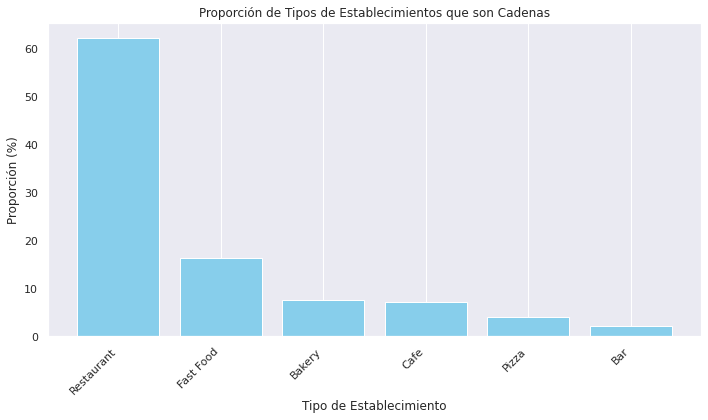

In [9]:
# Filtramos  el DataFrame para mostrar solo las filas donde 'chain' sea True
establecimientos_cadena = rest_data[rest_data['chain'] == True]

# Calculamos las proporciones de tipos de establecimientos únicos en el subconjunto con cadena
proporciones_tipos_cadena = establecimientos_cadena['object_type'].value_counts(normalize=True) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(proporciones_tipos_cadena.index, proporciones_tipos_cadena.values, color='skyblue')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Proporción (%)')
plt.title('Proporción de Tipos de Establecimientos que son Cadenas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**4. ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?**

Las características de las cadenas de establecimientos pueden variar dependiendo del tipo de negocio y la estrategia de la cadena en particular. Sin embargo, en general, existen algunas tendencias comunes que se pueden observar en las cadenas:

- 1.Muchos establecimientos con un pequeño número de asientos: Las cadenas de establecimientos tienden a tener múltiples sucursales distribuidas en diferentes ubicaciones. Estas sucursales suelen estar diseñadas para acomodar a un número moderado de clientes y, por lo tanto, pueden tener un tamaño más pequeño en términos de número de asientos. Este enfoque les permite llegar a una base de clientes más amplia al estar presentes en diferentes áreas geográficas.

- 2. Unos pocos establecimientos con un montón de asientos: Algunas cadenas de establecimientos también pueden tener unas pocas ubicaciones más grandes y espaciosas que están diseñadas para acomodar a un gran número de clientes a la vez. Estos establecimientos más grandes pueden ofrecer servicios adicionales, como áreas de juegos, espacios para eventos o presentaciones, o una amplia selección de productos y servicios.

- 3.Estandarización y consistencia:Una característica común de las cadenas es la estandarización de sus operaciones y la consistencia en la calidad y el servicio que ofrecen en todas sus sucursales. Esto se logra mediante la implementación de procesos y procedimientos uniformes, así como el uso de marcas y logotipos reconocibles.

- 4. Marca reconocible: Las cadenas tienden a desarrollar una marca reconocible que se asocia con ciertos valores, productos o servicios. Esta marca contribuye a la fidelidad del cliente y ayuda a establecer una identidad distintiva en el mercado.

- 5. Centralización y escalabilidad: Las cadenas a menudo operan de manera centralizada, lo que les permite mantener un mayor control sobre sus operaciones, distribución y calidad del producto o servicio. Además, la naturaleza centralizada de sus operaciones facilita la replicación y escalabilidad del negocio en diferentes ubicaciones.


Algunos ejemplos comunes de tipos de establecimientos que podrían considerarse cadenas son:

- Restaurante de comida rápida: Por ejemplo, McDonald's, Burger King, KFC.
- Cafeterías: Por ejemplo, Starbucks, Dunkin' Donuts.
- Tiendas de comida rápida y comida para llevar: Por ejemplo, Subway, Domino's Pizza.
- Restaurantes de servicio completo: A veces, también pueden tener varias sucursales bajo una misma marca.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen uso de las visualizaciones de las librerias matplot y seaborn
    
Ademas tus comentarios y hallazgos estan muy bien, ahondando en el contexto de los datos.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Las visualizaciones son acertadas con la informacion que quieres mostrar
    
Solo a modo de sugerencia, cuando tienes una variable con solo 2 categorias y quieres mostrar la proporcion el **grafico de torta** suele ser muy bueno tambien
    
Cuando por el contrario, tienes mas de 2 categorias el grafico de barras es mejor asi ordenado descendente como los hiciste o incluso **barras apiladas** tambiene suele ser muy bueno
</div>

**5. Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.**

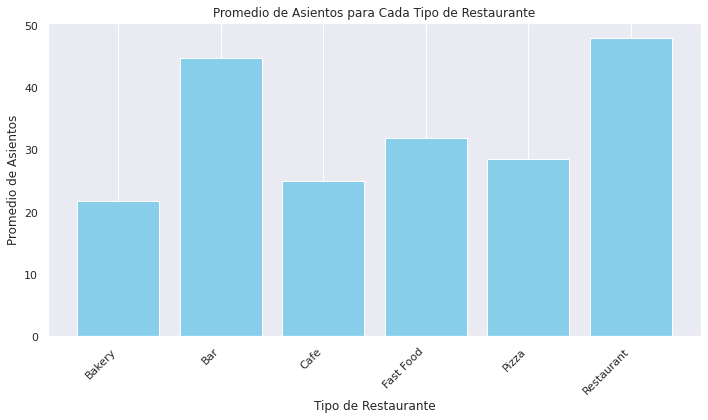

El tipo de restaurante con el mayor promedio de asientos es 'Restaurant' con un promedio de 48.04 asientos.


In [10]:
# Agrupar por tipo de restaurante y calculamos el promedio del número de asientos por establecimiento
promedio_asientos_por_tipo = rest_data.groupby('object_type')['number'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(promedio_asientos_por_tipo.index, promedio_asientos_por_tipo.values, color='skyblue')
plt.xlabel('Tipo de Restaurante')
plt.ylabel('Promedio de Asientos')
plt.title('Promedio de Asientos para Cada Tipo de Restaurante')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# A continuación calcularemos el tipo de restaurante con el mayor promedio de asientos
tipo_max_asientos = promedio_asientos_por_tipo.idxmax()
promedio_max_asientos = promedio_asientos_por_tipo.max()
print(f"El tipo de restaurante con el mayor promedio de asientos es '{tipo_max_asientos}' con un promedio de {promedio_max_asientos:.2f} asientos.")



In [11]:
rest_data[rest_data['object_type'] == 'Bar'].mean()

id        16743.544521
chain         0.263699
number       44.767123
dtype: float64

In [12]:
rest_data[rest_data['object_type'] == 'Fast Food'].mean()

id        16556.637899
chain         0.567542
number       31.837711
dtype: float64

En el gráfico anterior, podemos ver que el tipo de establecimiento con mayor promedio de asientos son los 'Restaurantes' con 48.04 asientos. Luego está los Bares con 45 asientos en promedio y en 3er lugar los establecimientos de Fast-food con 32 asientos promedios

**6. Coloca los datos de los nombres de las calles de la columna address en una columna separada.**

In [13]:
rest_data['address'].unique()

array(['3708 N EAGLE ROCK BLVD', '100 WORLD WAY # 120',
       '6801 HOLLYWOOD BLVD # 253', ..., '6741 HOLLYWOOD BLVD',
       '548 S SPRING ST STE 100', '1300 S SAN PEDRO ST STE 111'],
      dtype=object)

In [14]:
# Función para extraer el nombre de la calle de una dirección
def extraer_nombre_calle(address):
    # Utilizamos una expresión regular para encontrar el nombre de la calle
    import re
    pattern = r'(?:\d+\s+)?(.*?)(?:\s+\s*#\s*\d+)?$'
    match = re.match(pattern, address)
    if match:
        return match.group(1).strip()
    else:
        return None

# Aplicar la función a la columna "address" para extraer el nombre de la calle
rest_data['street_name'] = rest_data['address'].apply(extraer_nombre_calle)

# Mostrar el DataFrame con la nueva columna "street_name"
rest_data[['object_name', 'address', 'street_name']]


,object_name,address,street_name
0,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,N EAGLE ROCK BLVD
1,REILLY'S,100 WORLD WAY # 120,WORLD WAY
2,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,HOLLYWOOD BLVD
3,TRINITI ECHO PARK,1814 W SUNSET BLVD,W SUNSET BLVD
4,POLLEN,2100 ECHO PARK AVE,ECHO PARK AVE
...,...,...,...
9646,HALL OF JUSTICE,217 W TEMPLE AVE,W TEMPLE AVE
9647,FIN-MELROSE,5750 MELROSE AVE,MELROSE AVE
9648,JUICY WINGZ,6741 HOLLYWOOD BLVD,HOLLYWOOD BLVD
9649,MEDIDATE COFFEE,548 S SPRING ST STE 100,S SPRING ST STE 100


**7. Traza un gráfico de las diez mejores calles por número de restaurantes.**

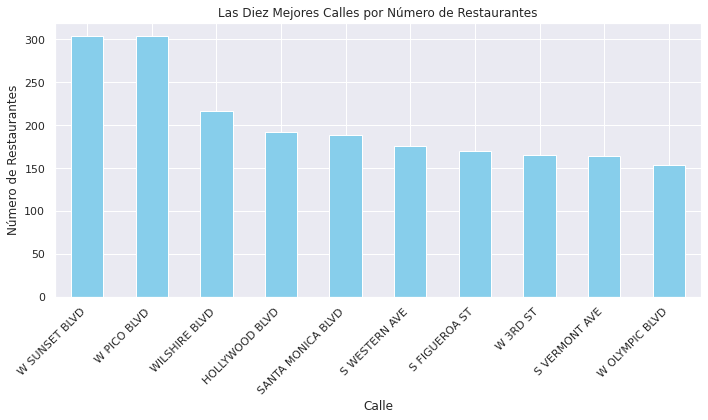

In [15]:
# Contar el número de restaurantes por calle
restaurantes_por_calle = rest_data['street_name'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
restaurantes_por_calle.plot(kind='bar', color='skyblue')
plt.title('Las Diez Mejores Calles por Número de Restaurantes')
plt.xlabel('Calle')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Como podemos ver en el gráfico anterior, Las 3 mejores calles por número de restaurantes son: W sunset Blvd, Wpico Blvd, wilshire blvd. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen uso de las visualizaciones y calculos para el tema de los **asientos**
    
Muy bien hecho tambien lidiando con el string de la direccion (**address**) de cada establecimiento y luego mostrando ese **TOP 10 de calles**
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Tu uso de regular expression (**regex**) esta muy bien, solo te sugiero que si vas a importar librerias lo hagas fuera de una funcion y lo sumes en la primer celda de codigo de la notebook donde importas las demas    
    
Ademas, te comparto esta otra forma alternativa de eliminar numeros en un string para que tengas en cuenta para futuros proyectos  
   
<code>
//defino funcion
def remove_numbers(address):
    return ''.join([c for c in address if not c.isdigit()])

//aplico funcion a la columna
df['address'] = df['address'].apply(remove_numbers)
</code>
</div>

**8. Encuentra el número de calles que solo tienen un restaurante.**

In [16]:
# Contamos cuántas veces aparece cada nombre de calle
calles_con_restaurantes = rest_data['street_name'].value_counts()

# Encontramos el número de calles que solo tienen un restaurante
calles_con_un_restaurante = calles_con_restaurantes[calles_con_restaurantes == 1]

# Obtenemos el número de calles que cumplen la condición
numero_calles_con_un_restaurante = len(calles_con_un_restaurante)

print("Número de calles que solo tienen un restaurante:", numero_calles_con_un_restaurante)


Número de calles que solo tienen un restaurante: 1807


In [17]:
calles_con_un_restaurante / rest_data['street_name'].count()*100

S WESTERN AVE 103         0.010362
WILSHIRE BLVD 116         0.010362
W SLAUSON AVE STE E       0.010362
ABBOT KINNEY              0.010362
STA MON BLVD STE FC11     0.010362
                            ...   
WORLD WAY # T93           0.010362
HOLLYWOOD BLVD STE 120    0.010362
WORLD WAY LVL6 SP5        0.010362
N CENTRAL AVE #           0.010362
WORLD WAY T51             0.010362
Name: street_name, Length: 1807, dtype: float64

Del total de las calles, solo un 0.01% tiene sólo 1 restaurante en su calle

**9. Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?**

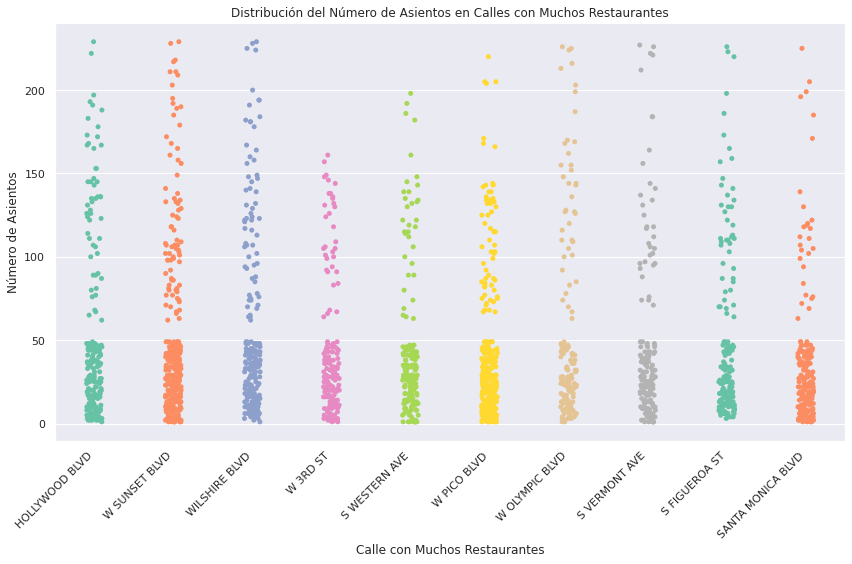

In [18]:
# Obtener las 10 calles con más restaurantes
calles_con_muchos_restaurantes = rest_data['street_name'].value_counts().sort_values(ascending=False).head(10).index

# Filtrar las filas correspondientes a las calles con muchos restaurantes
restaurantes_en_calles_con_muchos = rest_data[rest_data['street_name'].isin(calles_con_muchos_restaurantes)]

# Crear el gráfico stripplot
plt.figure(figsize=(12, 8))
sns.stripplot(x='street_name', y='number', data=restaurantes_en_calles_con_muchos, jitter=True, palette='Set2', dodge=True)
plt.title('Distribución del Número de Asientos en Calles con Muchos Restaurantes')
plt.xlabel('Calle con Muchos Restaurantes')
plt.ylabel('Número de Asientos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


En la distribución anterior, podemos ver que dentro de las 10 calles con mayor número de restaurantes, existe una concentración de restaurantes que cuentan con 50 asientos. 
Por otra parte, la calle W. Sunset BLVD cuenta con mayor concentración de restaurantes cerca de los 50 asientos por restaurantes. De igual manera, a pesar de que exiten algunos valores atípicos para todas las calles, nuevamente la calle W. Sunset BLVD cuenta con una alta concentración de datos sobre restaurantes que contienen más de 200 asientos, al igual que la calle Wilshire BLVD. 

De otra parte, la calle con menos catidad de asientos por restaurantes, es la de W 3RD ST, donde probablemente podemos encontrar a los establecimientos más pequeños.



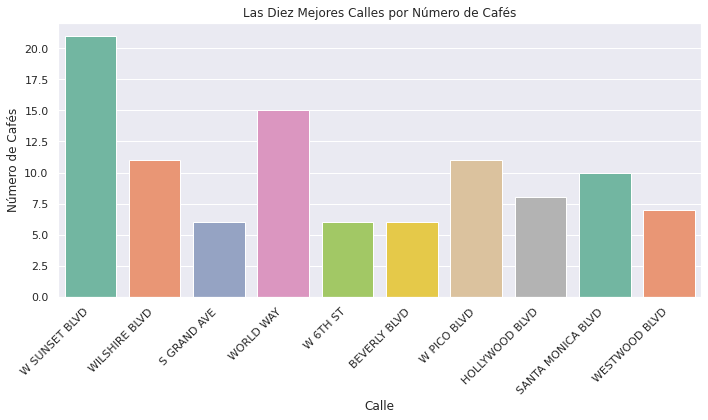

In [19]:
#queremos ver las 10 calles con mayor número de cafeterias

# Filtrar el DataFrame para obtener solo los establecimientos de tipo "cafe"
cafes_data = rest_data[rest_data['object_type'] == 'Cafe']

# Obtener las 10 calles con más establecimientos de tipo "cafe"
calles_con_mas_cafes = cafes_data['street_name'].value_counts().head(10).sort_values(by= ,ascending=False).index

# Filtrar las filas correspondientes a las calles con más establecimientos de tipo "cafe"
cafes_en_calles_con_mas = cafes_data[cafes_data['street_name'].isin(calles_con_mas_cafes)]

# Crear el gráfico de barras con las calles con más establecimientos de tipo "cafe"
plt.figure(figsize=(10, 6))
sns.countplot(data=cafes_en_calles_con_mas, x='street_name', palette='Set2')
plt.title('Las Diez Mejores Calles por Número de Cafés')
plt.xlabel('Calle')
plt.ylabel('Número de Cafés')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Con un grupo de amigos hemos decidido abrir un pequeño café regentado por robots en Los Ángeles. El proyecto es prometedor pero caro, por lo que debemos hacer una presentación para intentar atraer inversionistas. Están interesados en las condiciones actuales del mercado, pero la pregunta al final del día será: ¿podremos mantener el éxito del café cuando la novedad de los camareros robot desaparezca?

En conclusión, cuando se trata de la apertura del pequeño café regentado por robots en Los Ángeles. Lo mejor sería establecer el cafe en la calle W Pico BLV o Hollywood BLVD. Esto se debe a que estas dos calles cuentan con un gran número de restaurantes, no así de cafes, por lo que la creación de un café en calles con alta concentración de gente nos ayudará a la tracción de nuevos clientes a nuestro cafe, al igual que de awareness. 

Por otro lado, al lanzar un restaurante a través de una cadena nos ayudará a la promoción inicial de nuestro establecimiento.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen uso de las visualizaciones y calculos para el tema de los **asientos** en las mejores calles.
    
El uso de striplot me parece muy buena alternativa a lo que podria haber sido un box plot o violin plot
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

El top 10 de calles para cafes esta bien, solo suegiero que si es justamente un top 10 este ordenado descendente
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>
    
Hola Matias, estoy tratando de seguir tu consejo y ordenar el top 10  de forma descendente. Pero no resulta, ¿Me puedes ayudar con esto?, por favor. 
   
    calles_con_mas_cafes = cafes_data['street_name'].value_counts().head(10).sort_values(ascending=False).index
    
</div>

# Paso 3. Preparar una presentación:

Presentation: <enlace al almacenamiento en la nube> 

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Para poder aprobar tu proyecto solo quedaria poder acceder a la presentacion, el link no esta funcionando
    
Te dejo este <a href='https://www.w3schools.io/file/markdown-links/'> recurso </a> para que uses de guia y puedas asi dejarme el link a tu presentacion
    
De hecho, de la misma manera que yo estoy dejando este link, podrias dejarme el link a tu presentacion. En el recurso veras esta manera y otras alternativas de Markdown para dejar links
</div>

<div class="alert alert-block alert-light">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

En cuanto a el resto de tu proyecto, todo lo que esta en esta notebook esta muy bien no precisa correcciones, solo te deje algunas sugerencias para que tengas en cuenta a futuro
</div>

<a href="https://drive.google.com/file/d/16jRjNLUCaMHqG7Ts7Swr7-1dV5aqC1AB/view?usp=drive_link">Proyecto Paulina LM</a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 2da ITERACION</b> <a class="tocSkip"></a>

Buenisimo Paulina, ahora si pude acceder a tu presentacion
    
Hiciste un gran trabajo en este proyecto, te felicito esta aprobado
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor - 2da ITERACION</b> <a class="tocSkip"></a>
    
En cuanto al ultimo grafico, el tema esa para mi en como obtienes el dataframe con el que ploteas el grafico mas que con el grafico en si
    
Mas que countplot use un barplot, pero mas alla de eso creo que el tema esta en el groupby y el count
    
Te dejo el bloquee de codigo para que lo pruebes y tengas en cuenta para futuros proyectos
    
<code>
    top10_cafes = cafes_data.groupby('street_name')['id'].count().sort_values(ascending=False).head(10).reset_index()

    plt.figure(figsize=(10, 6))

    sns.barplot(data=top10_cafes, x='street_name', y='id', palette='Set2')

    plt.title('Las Diez Mejores Calles por Número de Cafés')
    plt.xlabel('Calle')
    plt.ylabel('Número de Cafés')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
</code>